## Model the Energy Efficiency of Building Designs with Python and Machine Learning

---

<div data-purpose="lab-overview" class="lab-overview--overview-container--1KX_6"><h2 class="ud-heading-xl">Lab scenario</h2><div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>You are a data scientist working for Green Architecture, a large architectural firm focused on designing energy-efficient buildings. The architects need a machine learning model that can quickly predict the heating and cooling loads of a building given its high-level attributes, such as roof area, window area, height, and orientation. Green Architecture's Director of Technology has tasked you with building and tuning this model to provide immediate feedback on energy efficiency to the architects as they develop their designs. The Director expects you to train, tune and evaluate several different model types given data on the known energy efficiency of existing buildings and recommend the best model and parameters for predicting the heating and cooling loads of new building designs.</p></div></div>

<div class="lab-overview--overview-section--dyhqD" data-purpose="what-you-will-do-list"><h2 class="ud-heading-xl">Objectives</h2><ul class="ud-unstyled-list ud-block-list lab-goals-list--items-list--OpEKI"><li><div class="ud-block-list-item ud-block-list-item-large ud-block-list-item-neutral ud-text-md"><svg aria-hidden="true" focusable="false" class="ud-icon ud-icon-small ud-icon-color-neutral ud-block-list-item-icon"><use xlink:href="#icon-tick"></use></svg><div class="ud-block-list-item-content">Build, tune, and evaluate regression models with linear regression, decision trees, and random forests</div></div></li><li><div class="ud-block-list-item ud-block-list-item-large ud-block-list-item-neutral ud-text-md"><svg aria-hidden="true" focusable="false" class="ud-icon ud-icon-small ud-icon-color-neutral ud-block-list-item-icon"><use xlink:href="#icon-tick"></use></svg><div class="ud-block-list-item-content">Transform categorical data to one-hot encoding with Python and Pandas</div></div></li><li><div class="ud-block-list-item ud-block-list-item-large ud-block-list-item-neutral ud-text-md"><svg aria-hidden="true" focusable="false" class="ud-icon ud-icon-small ud-icon-color-neutral ud-block-list-item-icon"><use xlink:href="#icon-tick"></use></svg><div class="ud-block-list-item-content">Normalize feature data as appropriate for its data distribution with scikit-learn</div></div></li></ul></div>

<div class="project-overview--content--5pYFt"><div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Your idea about using machine learning to guide energy-efficient building design has our architects excited! I want you to develop a proof of concept. We have some data on the actual heating and cooling loads of buildings that have different design choices including their geometry, window placement, and orientation. Find the best machine learning model to predict the efficiency of a given building design - if it's effective, we'll integrate it into our architects' tools to give them real-time feedback while they work!</p></div><div class="project-overview--project-overview-container--1p-6S"><div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Start with the Jupyter notebook and csv file (ENB2012_data.csv) that I've loaded into your workspace. Although the data has been cleaned, you'll still need to prepare it for machine learning. The "Orientation" and "WindowsDistribution" columns are categorical in nature, and need to be one-hot encoded somehow. Since we can only predict one thing at a time, combine the heating and cooling loads into a single metric by adding them together. You'll also need to normalize the feature data in a way that makes sense for its observed distribution. Once it's prepared, split your data into training and testing sets (an 80/20 split), and measure the accuracy of linear regression, decision trees, and random forests for modeling this data using root mean-squared error. Random forests have a few hyperparameters to tune, so if that model looks promising, double down on it and do a grid search for its best parameter values.&nbsp; Let me know which model performed the best, its mean absolute error, and the parameters you chose. Then, our software developers can go about integrating it into the architects' tools. Oh, and whenever you're doing random splits or anything, be sure to use a random state of "1234" so your results may be reproduced.</p></div></div></div>

---
<h3 class="ud-heading-md ">1. Load and inspect our energy efficiency data</h3>
<p>Load our data set of building attributes and their heating and cooling loads into a Pandas DataFrame named <strong>buildings</strong> and confirm it loads successfully. Explore the data with some high-level statistical measures to understand its nature and confirm there are no missing values in the data set. </p>

In [1]:
import pandas as pd
import numpy as np
 
buildings = pd.read_csv("ENB2012_data.csv")
buildings.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [2]:
buildings.describe()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [3]:
buildings.isnull().values.any()

False

---
<h3 class="ud-heading-md ">2. Combine the heating and cooling loads into a single metric</h3>
<p>To simplify our model, replace the "CoolingLoad" and "HeatingLoad" columns with a single "CombinedLoad" column that adds them together for each row.&nbsp;Remove the original heating and cooling load columns when complete.</p>

In [4]:
# Create a new CombinedLoad column from the sum of HeatingLoad and CoolingLoad.
buildings['CombinedLoad'] = buildings['HeatingLoad'] + buildings['CoolingLoad']

In [5]:
buildings.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad,CombinedLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


In [6]:
buildings.drop(['HeatingLoad', 'CoolingLoad'], axis=1, inplace=True)

In [7]:
buildings.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,CombinedLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,49.12


<h3 class="ud-heading-md ">3. One-hot encode the categorical data in our DataFrame</h3>
<p>The "Orientation" and "WindowsDistribution" columns are not numeric values; the integers in these columns represent categories. "Orientation" maps to North, South, East, and West, and "WindowsDistribution" maps to six&nbsp; different layouts for positioning windows in a building. To make this data suitable for machine learning, these columns must be replaced with one-hot encoded representations, with individual binary columns for each possible value.<br><br>Create a new DataFrame named "encoded", which replaces the "Orientation" and "WindowsDistribution" columns with one-hot-encoded columns in our DataFrame.</p>

In [8]:
encoded = pd.get_dummies(buildings, columns=['Orientation', 'WindowsDistribution'])

In [9]:
encoded.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,WindowsArea,CombinedLoad,Orientation_2,Orientation_3,Orientation_4,Orientation_5,WindowsDistribution_0,WindowsDistribution_1,WindowsDistribution_2,WindowsDistribution_3,WindowsDistribution_4,WindowsDistribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,36.88,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,49.12,1,0,0,0,1,0,0,0,0,0


<h3 class="ud-heading-md ">4. Split our data into features and labels</h3>
<p>To train our machine learning models, we must split our encoded data set into its features (attributes) and labels (the values we are trying to predict). Create a Series <strong>y</strong> containing our label data from the "CombinedLoad" column and a feature DataFrame <strong>X</strong> containing the remaining columns. By convention, be sure <strong>X </strong>is upper-case, and <strong>y </strong>is lower-case.</p>

In [10]:
X = encoded.drop(['CombinedLoad'], axis=1)

In [11]:
X.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,WindowsArea,Orientation_2,Orientation_3,Orientation_4,Orientation_5,WindowsDistribution_0,WindowsDistribution_1,WindowsDistribution_2,WindowsDistribution_3,WindowsDistribution_4,WindowsDistribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,1,0,0,0,1,0,0,0,0,0


In [12]:
y = encoded['CombinedLoad']
y

0      36.88
1      36.88
2      36.88
3      36.88
4      49.12
       ...  
763    39.28
764    33.42
765    33.55
766    33.09
767    32.67
Name: CombinedLoad, Length: 768, dtype: float64

<h3 class="ud-heading-md ">5. Normalize the feature data in preparation for training</h3>
<p>Some models require all features to be normalized into comparable ranges of values in order to weight them evenly. Data with a Gaussian distribution should be standardized to a mean of 0 and variance of 1, but non-Gaussian data may be normalized to the range 0-1 by scaling it within its minimum and maximum values.<br><br>Plot a histogram of our feature columns in the <strong>X</strong> DataFrame to understand their distribution and apply the appropriate normalization scheme to them. Store the normalized data into a new DataFrame named <strong>X_scaled</strong>.</p>

array([[<Axes: title={'center': 'Compactness'}>,
        <Axes: title={'center': 'SurfaceArea'}>],
       [<Axes: title={'center': 'WallArea'}>,
        <Axes: title={'center': 'RoofArea'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'WindowsArea'}>]], dtype=object)

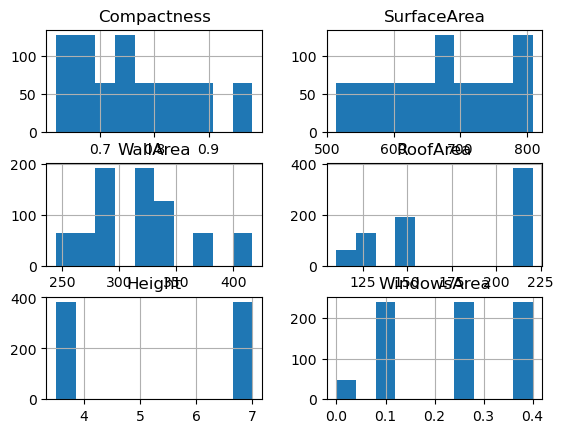

In [17]:
X.hist(column=['Compactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'Height', 'WindowsArea'])

array([[<Axes: title={'center': 'Compactness'}>,
        <Axes: title={'center': 'SurfaceArea'}>],
       [<Axes: title={'center': 'WallArea'}>,
        <Axes: title={'center': 'RoofArea'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'WindowsArea'}>]], dtype=object)

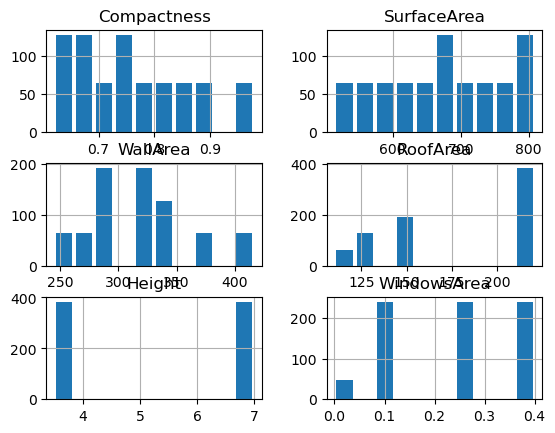

In [22]:
X.hist(column=['Compactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'Height', 'WindowsArea'], rwidth=0.8)

In [23]:
''' We will choose to normalize these columns by scaling them into the range 0-1 prior to training. 
Use MinMaxScaler from scikit-learn to achieve this, and convert the resulting array back to a Pandas DataFrame.
'''
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [24]:
X_scaled.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.000000,0.285714,0.000000,1.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,1.000000,0.714286,1.000000,0.0,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
96,1.000000,0.000000,0.285714,0.000000,1.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97,1.000000,0.000000,0.285714,0.000000,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,1.000000,0.000000,0.285714,0.000000,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<h3 class="ud-heading-md ">6. Split our prepared data into training and testing sets</h3>
<p>Split our feature data <strong>X_scaled </strong>and label data <strong>y</strong> into randomly split data sets for training and testing our machine learning models.&nbsp; Set aside 20% of the data for testing. The resulting data sets should be named <strong>X_train</strong>, <strong>X_test</strong>, <strong>y_train</strong>, and <strong>y_test</strong>. Perform the split with a random seed value of <strong>1234 </strong>to ensure consistent results.</p>

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234)

<h3 class="ud-heading-md challenge-description--header--egzgp">7. Train and evaluate a linear regression model</h3><br/>
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Train a <strong>LinearRegression </strong>model using our training data sets <strong>X_train </strong>and <strong>y_train</strong> and evaluate its performance on predicting energy loads for <strong>X_test </strong>against the labels <strong>y_test</strong>.</p><p>Report the model's performance using mean squared error (<strong>MSE</strong>), mean absolute error (<strong>MAE</strong>), and root mean squared error (<strong>RMSE</strong>).</p></div>

In [27]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

Report the model's performance using mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE).
<p>Use <strong>predict </strong>on the model to generate predictions from&nbsp;<strong>X_test</strong> and measure its accuracy against <strong>y_test </strong>using <strong>mean_squared_error </strong>and <strong>mean_absolute_error </strong>from scikit-learn. Compute RMSE from the square root of MSE.<br></p>

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
 
test_mse = mean_squared_error(y_test, model.predict(X_test))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

Testing mse =  30.377885714285718  mae =  4.075064935064935  rmse =  5.511613712360992


<h3 class="ud-heading-md ">8. Train and evaluate a decision tree regressor model</h3>
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Train a <strong>DecisionTreeRegressor </strong>model using our training data sets <strong>X_train </strong>and <strong>y_train</strong> and evaluate its performance on predicting energy loads for <strong>X_test </strong>against the labels <strong>y_test</strong>. To ensure consistent results, specify a <strong>random_state </strong>of <strong>1234</strong>.</p><p>Report the model's performance using mean squared error (<strong>MSE</strong>), mean absolute error (<strong>MAE</strong>), and root mean squared error (<strong>RMSE</strong>.).</p></div>

In [30]:
from sklearn.tree import DecisionTreeRegressor
 
tree_model = DecisionTreeRegressor(random_state=1234)

In [31]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1234)

In [32]:
test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

Testing mse =  4.424222077922075  mae =  1.2259740259740257  rmse =  2.103383483324445


<h3 class="ud-heading-md ">9. Train and evaluate a random forest regressor model</h3>
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Train a <strong>RandomForestRegressor </strong>model using our training data sets <strong>X_train </strong>and <strong>y_train</strong> and evaluate its performance on predicting energy loads for <strong>X_test </strong>against the labels <strong>y_test</strong>. To ensure consistent results, specify a <strong>random_state </strong>of <strong>1234</strong>.</p><p>Report the model's performance using mean squared error (<strong>MSE</strong>), mean absolute error (<strong>MAE</strong>), and root mean squared error (<strong>RMSE</strong>).</p></div>

In [33]:
from sklearn.ensemble import RandomForestRegressor
 
forest_model = RandomForestRegressor(random_state=1234)

In [34]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1234)

In [35]:
test_mse = mean_squared_error(y_test, forest_model.predict(X_test))
test_mae = mean_absolute_error(y_test, forest_model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

Testing mse =  2.8172801671428482  mae =  1.0998155844155841  rmse =  1.6784755485686553


<h3 class="ud-heading-md ">10. Perform a grid search for the best random forest hyperparameters and apply them</h3>
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Refine our <strong>RandomForestRegressor </strong>model by searching for its optimal hyperparameters. Conduct a grid search with 5-fold cross-validation, testing values of <strong>n_estimators </strong>of 10, 100, 200 and 500&nbsp; and values of <strong>criterion </strong>with "squared_error", "absolute_error", and "poisson". For reproducibility, conduct this grid search with a <strong>random_state </strong>of <strong>1234</strong>.</p><p>Once the optimal parameters have been identified, create a new <strong>RandomForestRegressor </strong>with those parameters, train it with our test data, and evaluate the MAE, MSE, and RMSE against our test data.</p></div>

<p>Construct a <strong>GridSearchCV </strong>using the parameter grid specified and a <strong>RandomForestRegressor</strong>. Conduct the grid search with our test data <strong>X_train </strong>and&nbsp; <strong>y_train </strong>using the <strong>fit </strong>command. This may take a few minutes to run.<br></p>

In [36]:
from sklearn.model_selection import GridSearchCV
 
grid = {
    'n_estimators': [10, 100, 200, 500],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'random_state' : [1234]
}
 
forest_cv = GridSearchCV(estimator = RandomForestRegressor(),
                         param_grid=grid,
                         cv=5)
 
forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [10, 100, 200, 500],
                         'random_state': [1234]})

<p>Display the optimal parameters identified by the grid search by inspecting the resulting <strong>best_params_ </strong>dictionary:<br></p>

In [37]:
forest_cv.best_params_

{'criterion': 'absolute_error', 'n_estimators': 500, 'random_state': 1234}

<p>Train a new <strong>RandomForestRegressor </strong>using these parameters, and compute the MSE, MAE, and RMSE of this tuned model. This may take a few minutes to run.<br></p>

In [38]:
forest_model = RandomForestRegressor(n_estimators=500, criterion='absolute_error')
forest_model.fit(X_train, y_train)
 
test_mse = mean_squared_error(y_test, forest_model.predict(X_test))
test_mae = mean_absolute_error(y_test, forest_model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

Testing mse =  2.6345649596785865  mae =  1.0905208441558556  rmse =  1.6231343011835424
